<a href="https://colab.research.google.com/github/apurv1260/Analysis_Of_GooglePlayStore/blob/main/Google_Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Google Play Store apps and reviews***

---



Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Importing import libary for Data Cleaning, data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Let's take a look at the data, which consists of two files:



In [2]:
app = pd.read_csv("/content/apps.csv")
user = pd.read_csv("/content/user_reviews.csv")

In [3]:
app.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


***Data cleaning***

In [6]:
app.duplicated().sum()

0

In [7]:
app.shape

(9659, 14)

In [12]:
b = app['App'].value_counts()
print(b>1)

App
Photo Editor & Candy Camera & Grid & ScrapBook    False
Tic Tac CK                                        False
INFAMY RO                                         False
CK Call NEW                                       False
Ck Coif                                           False
                                                  ...  
Bike Race Free - Top Motorcycle Racing Games      False
Dance School Stories - Dance Dreams Come True     False
3D Bowling                                        False
Mind Games Pro                                    False
iHoroscope - 2018 Daily Horoscope & Astrology     False
Name: count, Length: 9659, dtype: bool


That's Mean No dulicated app in apps table

***Exploring app categories***

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

Which category has the highest share of (active) apps in the market?

Is any specific category dominating the market?

Which categories have the fewest number of apps?



In [13]:
app.Category.value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [19]:
b = app.Category.unique()
b.shape

(33,)

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

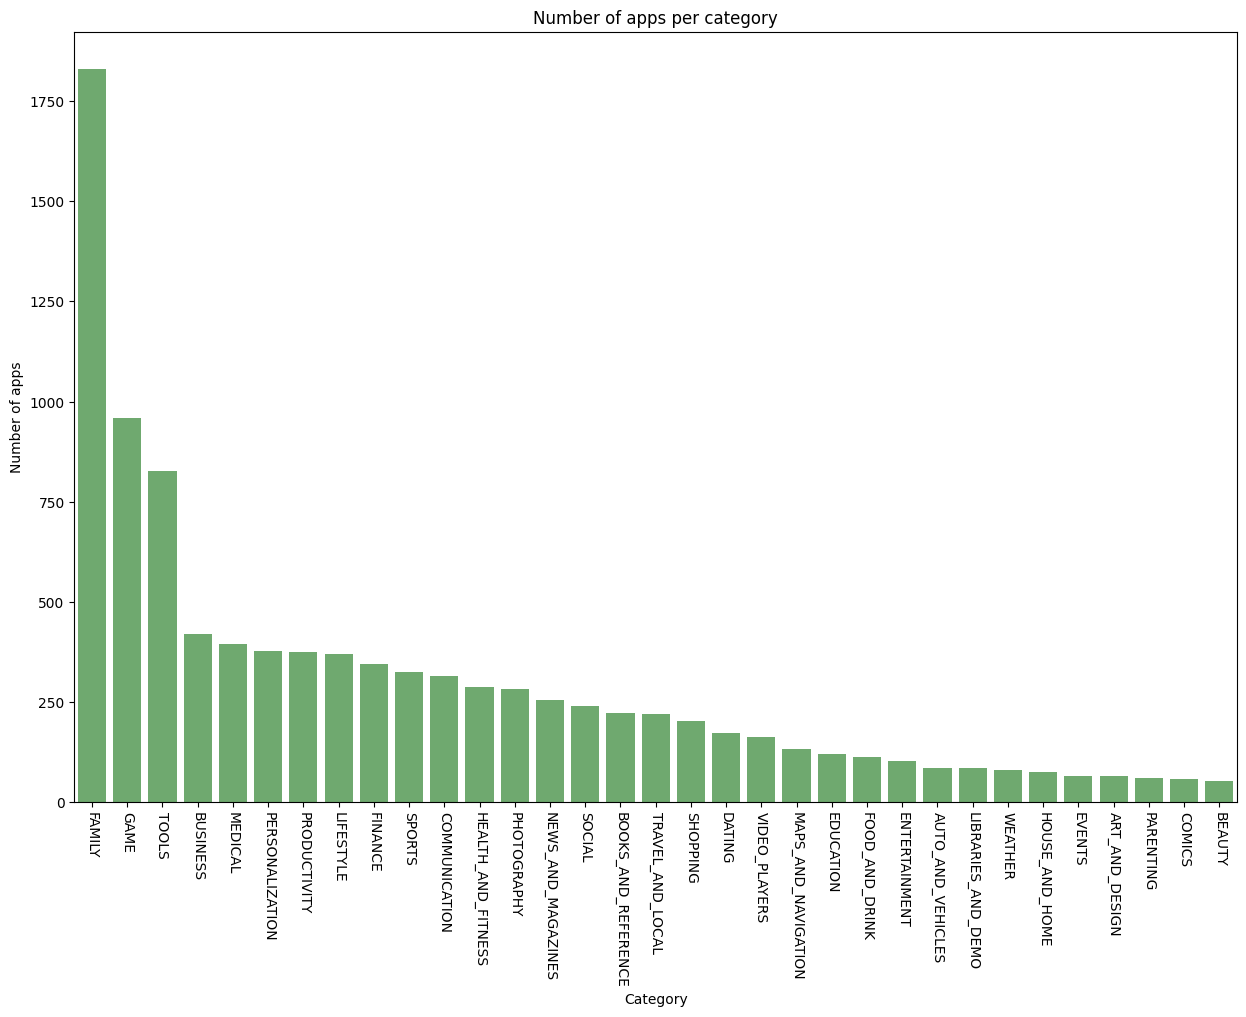

In [34]:
b = app['Category'].value_counts()
plt.figure(figsize=(15,10))
fig = sns.barplot(x = b.index, y = b.values,color='g',alpha=0.6)
plt.xticks(rotation=270)
fig.set_title('Number of apps per category')
fig.set_xlabel('Category')
fig.set_ylabel('Number of apps')
plt.show()

***Distribution of app ratings***


After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

In [35]:
import plotly.express as px
import plotly.graph_objects as go

In [38]:
avg_app_rating = app['Rating'].mean()
avg_app_rating

4.173243045387994

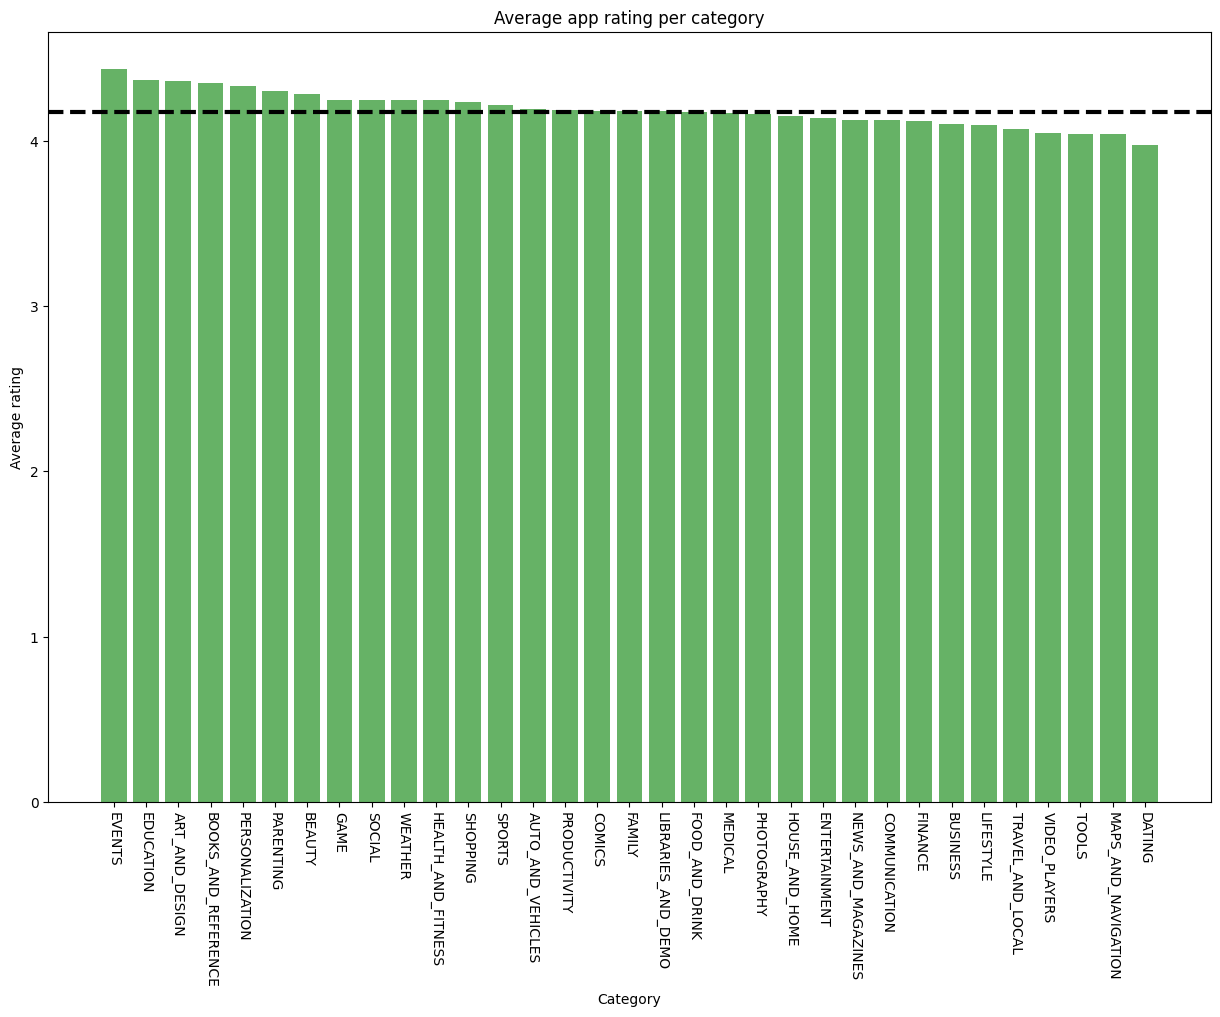

In [45]:
b = app.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
fig = plt.bar(x=b.index,height=b.values,color='g',alpha=0.6)
plt.axhline(y=avg_app_rating, ls='--', color='black', linewidth=3)
plt.xticks(rotation=270)
plt.title('Average app rating per category')
plt.xlabel('Category')
plt.ylabel('Average rating')
plt.show()

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

***Size and price of an app***


Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?



Does the size of an app affect its rating?

Do users really care about system-heavy apps or do they prefer light-weighted apps?

Does the price of an app affect its rating?

Do users always prefer free apps over paid apps?

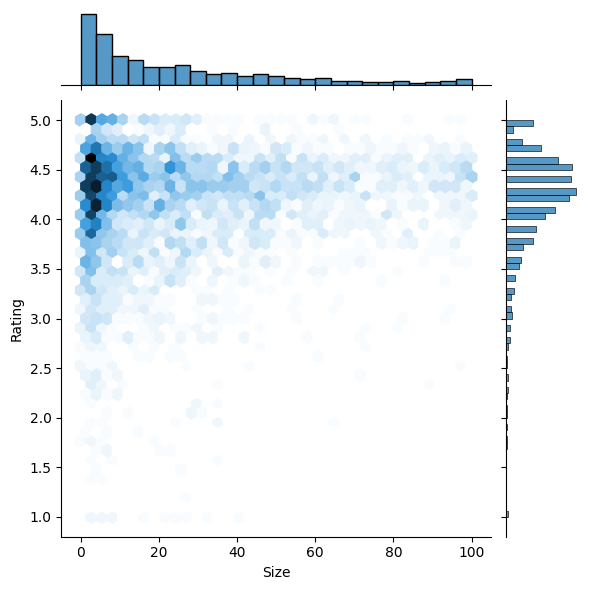

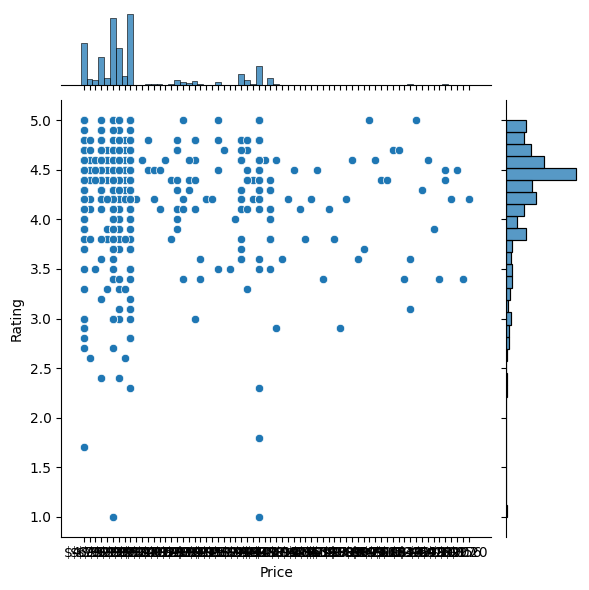

In [52]:
# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = app[(~app['Rating'].isnull()) & (~app['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])


We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

***Relation between app category and app price***

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

In [3]:
# Select a few popular app categories
popular_app_cats = app[app.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

Text(0.5, 1.0, 'App pricing trend across categories')

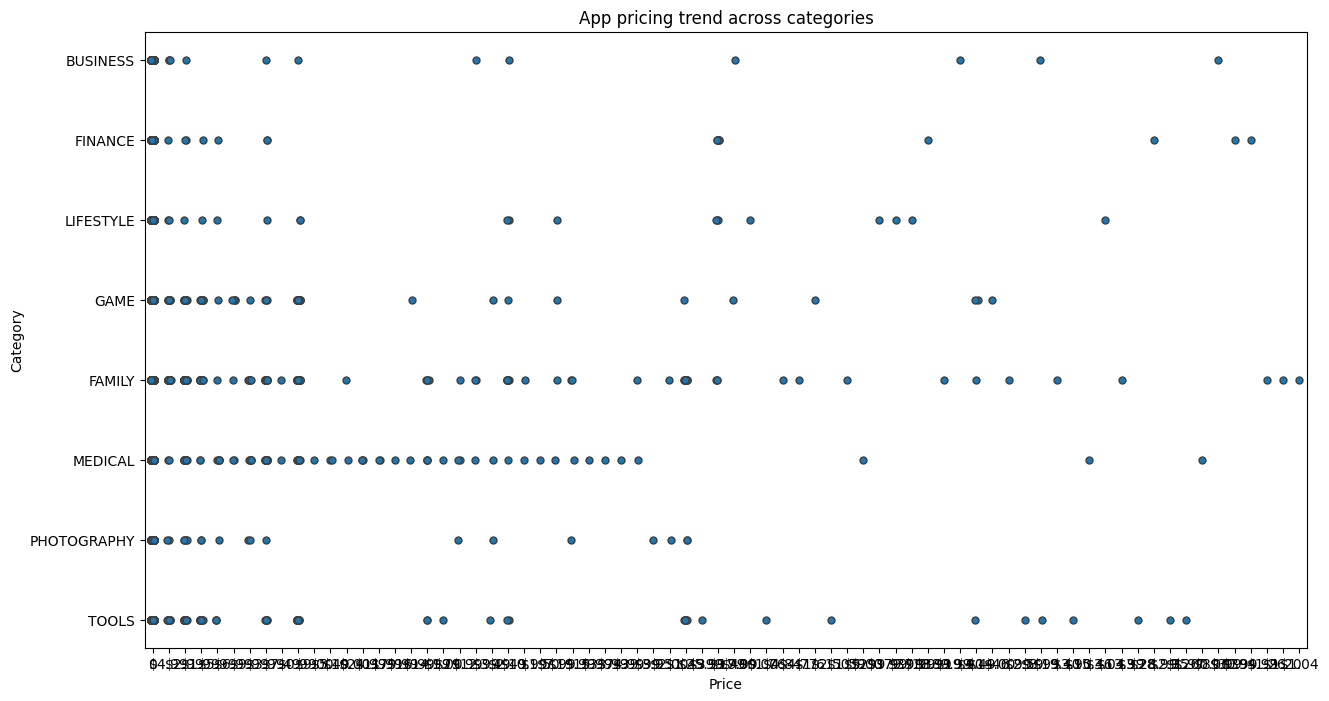

In [8]:
fig, b = plt.subplots()
fig.set_size_inches(15, 8)

b =  sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
b.set_title('App pricing trend across categories')


Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to  80 All game apps are reasonably priced below 20.

***Popularity of paid apps vs free apps***

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

Free to download.

Main source of income often comes from advertisements.

Often created by companies that have other products and the app serves as an extension of those products.

Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

Users are asked to pay once for the app to download and use it.

The user can't really get a feel for the app before buying it.

In [32]:
# Convert 'Installs' column to numeric, handling non-numeric values
app['Installs'] = app['Installs'].str.replace(',', '')  # Remove commas
app['Installs'] = app['Installs'].str.replace('+', '', regex=False)  # Remove '+'
app['Installs'] = pd.to_numeric(app['Installs'])

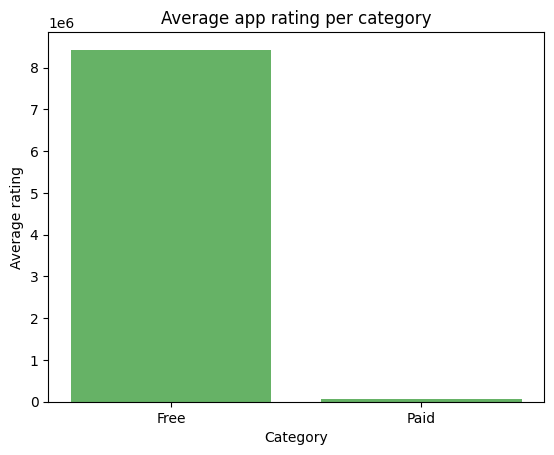

In [34]:
b = app.groupby('Type')['Installs'].mean().sort_values(ascending=False)
fig = plt.bar(x=b.index,height=b.values,color='g',alpha=0.6)
plt.title('Average app rating per category')
plt.xlabel('Category')
plt.ylabel('Average rating')
plt.show()

Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

***Sentiment analysis of user reviews***

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

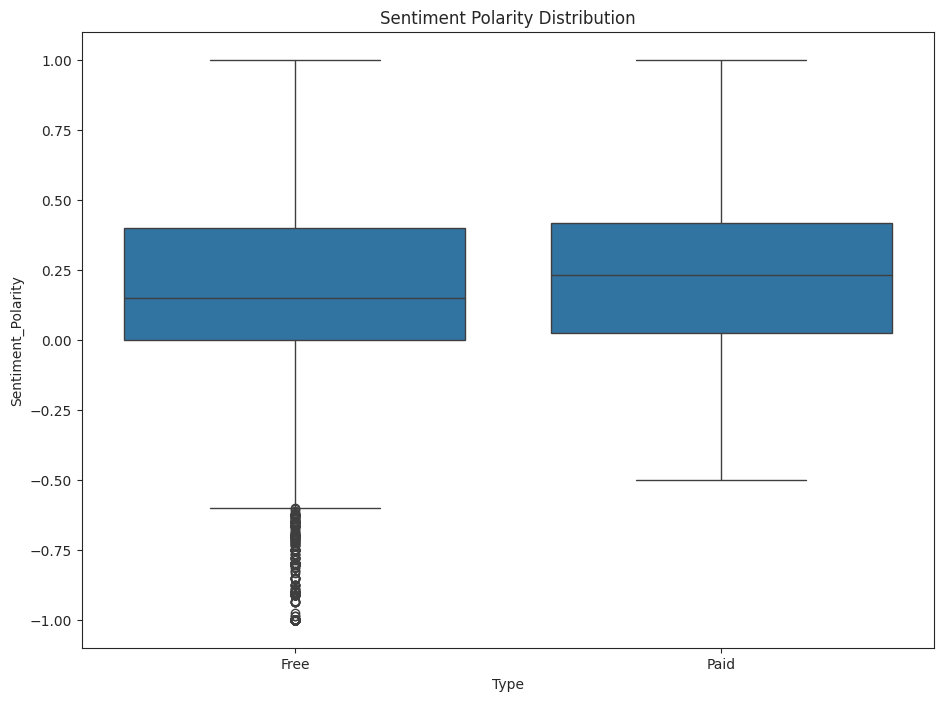

In [36]:

# Join and merge the two dataframe
merged_df = pd.merge(app, user, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.